In [1]:
%load_ext autoreload

In [248]:
%autoreload 2
import torch
import pandas as pd
from wrapers import *

In [3]:
model = torch.load("../GraphDTA/model_GINConvNet_davis.model", weights_only=True)

In [129]:
model = GINConvNet_augmented()
model.load_state_dict(torch.load("../GraphDTA/model_GINConvNet_davis.model", weights_only=True))

<All keys matched successfully>

In [5]:
data_source = pd.read_csv('../data/TASK1 Material_Drug_SMILES.csv')

In [6]:
iso_smiles, smiles_id_dict, smiles_graphs = smiles_to_graphs(data_source["drugbank_id"].values,
                                                             data_source["SMILES"].values, isomericSmiles=True)

[21:26:34] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[21:26:34] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[21:26:34] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'


The smiles id 1691:DB01929 has been failed.
The smiles id 1760:DB01999 has been failed.


[21:26:34] Explicit valence for atom # 19 O, 2, is greater than permitted


The smiles id 2382:DB02667 has been failed.


[21:26:34] Explicit valence for atom # 0 O, 3, is greater than permitted
[21:26:34] Unusual charge on atom 0 number of radical electrons set to zero
[21:26:34] Explicit valence for atom # 1 Al, 4, is greater than permitted


The smiles id 3717:DB04100 has been failed.
The smiles id 4034:DB04444 has been failed.


[21:26:35] Explicit valence for atom # 13 Be, 4, is greater than permitted


The smiles id 6588:DB08276 has been failed.


[21:26:36] Explicit valence for atom # 84 N, 4, is greater than permitted
[21:26:36] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[21:26:36] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


The smiles id 7539:DB09385 has been failed.
The smiles id 7944:DB11630 has been failed.


[21:26:36] Explicit valence for atom # 1 Cl, 4, is greater than permitted


The smiles id 8630:DB12453 has been failed.


[21:26:37] WARNING: not removing hydrogen atom without neighbors
[21:26:37] WARNING: not removing hydrogen atom without neighbors
[21:26:37] Explicit valence for atom # 1 B, 6, is greater than permitted


The smiles id 11585:DB17408 has been failed.


[21:26:45] Unusual charge on atom 42 number of radical electrons set to zero
[21:27:02] WARNING: not removing hydrogen atom without neighbors
[21:27:02] WARNING: not removing hydrogen atom without neighbors


In [7]:
from torch.utils.data.dataloader import DataLoader
dataset = CompoundsStream(iso_smiles, smiles_graphs, smiles_id_dict)
embedding_loader = DataLoader(dataset=dataset, batch_size = 1)

In [96]:
model.eval()
embedded_mols = []
with torch.no_grad():
    for data in embedding_loader:
        #print(data.x[0], model2.g_embedding(data.x[0]))        
        m = model.g_embedding3(data)
        embedded_mols.append(m)

In [72]:
len(embedded_mols), data_source.shape, data_source.shape[0] - len(embedded_mols), data_source.shape[0]-len(iso_smiles)

(11914, (11924, 4), 10, 10)

In [73]:
def save_csv(embedded, method_name, extra=""):
    df = pd.DataFrame({
        'embedding':[str(item.view(-1).numpy().tolist()) for item,_ in embedded_mols],
        'label':[str(item[0]) for _, item in embedded]
    })
    df.to_csv(f"../data/drug_{method_name}{extra}_label.csv", index=False)
    
    

In [74]:
save_csv(embedded_mols, "GraphDTA_GINConvNet")

In [111]:
[ item.shape for item in embedded_mols[0][-5:]], embedded_mols[0][-1]

([torch.Size([155, 32]),
  torch.Size([155, 32]),
  torch.Size([1, 32]),
  torch.Size([1, 128]),
  (1,)],
 array(['DB00006'], dtype='<U7'))

In [119]:
#smile_to_graph(data_source[data_source["drugbank_id"] == "DB00006"]["SMILES"][0])

In [75]:
smiles_graphs["[F-]"]

(1,
 [array([0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  ])],
 [[0, 0]])

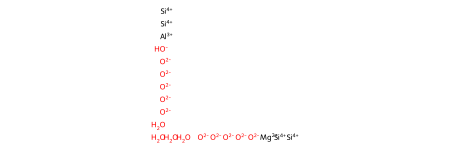

In [76]:
from rdkit import Chem
from rdkit.Chem import MolFromSmiles
#list(Chem.MolFromSmiles("[F-]").GetBonds())
mol = Chem.MolFromSmiles("O.O.O.O.[Al+3].[Mg+2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[OH-].[Si+4].[Si+4].[Si+4].[Si+4]")
mol

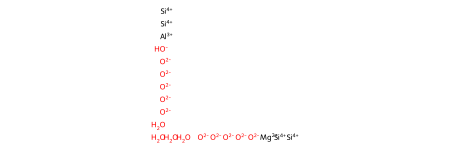

In [77]:
Chem.MolFromSmiles("O.O.O.O.[Al+3].[Mg+2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[O-2].[OH-].[Si+4].[Si+4].[Si+4].[Si+4]")

In [78]:
data_source[data_source["drugbank_id"] == "DB09511"]

,drugbank_id,drug_name,type,SMILES
7589,DB09511,Talc,small molecule,[O--].[O--].[O--].[O--].[O--].[O--].[O--].[O--...


In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [80]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(np.array([ item[0].numpy().reshape(-1) for item in embedded_mols ]))

df = pd.DataFrame({})
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]


df2 = data_source.set_index("drugbank_id")

def check_is_odd(id):    
    smiles = df2.loc[id]["SMILES"]
    mol = Chem.MolFromSmiles(smiles)    
    return len(mol.GetBonds()) == 0
    
df['odd-one'] =   [ check_is_odd(item[1][0]) for item in embedded_mols ]


[01:54:42] Unusual charge on atom 0 number of radical electrons set to zero
[01:54:46] WARNING: not removing hydrogen atom without neighbors
[01:54:46] WARNING: not removing hydrogen atom without neighbors


/tmp/ipykernel_2497128/1535489185.py:5: UserWarning: The palette list has more values (100) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

<Figure size 1000x1000 with 0 Axes>

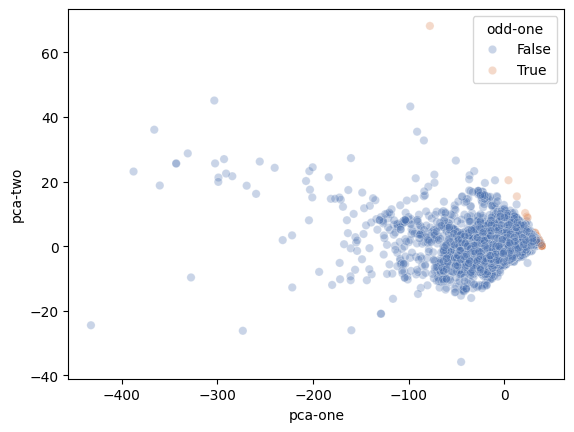

In [87]:
plt.figure(figsize=(10,10))
np.random.seed(42)
fig, ax = plt.subplots()
rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3,
    ax=ax
)
# ax.set_xlim(-35, 25)
# ax.set_ylim(-0,5)

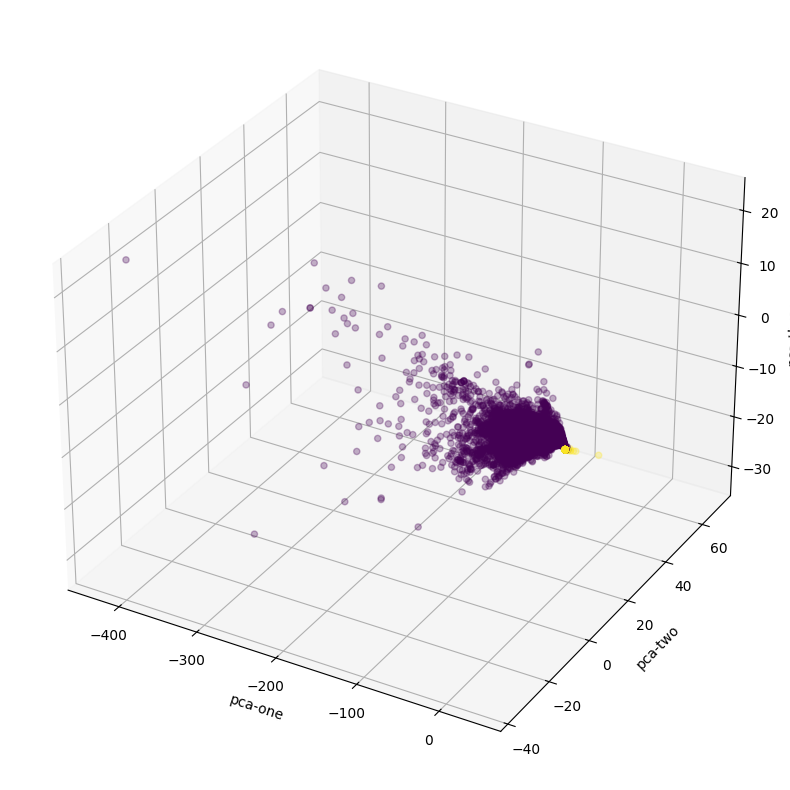

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["odd-one"], 
    #cmap='tab20c_r'
    alpha=.3
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [83]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(np.array([ item[0].numpy().reshape(-1) for item in embedded_mols ]))

/home/roozbeh/Desktop/comp-bio/task1/.venv_graphdta/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11914 samples in 0.001s...
[t-SNE] Computed neighbors for 11914 samples in 1.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11914
[t-SNE] Computed conditional probabilities for sample 2000 / 11914
[t-SNE] Computed conditional probabilities for sample 3000 / 11914
[t-SNE] Computed conditional probabilities for sample 4000 / 11914
[t-SNE] Computed conditional probabilities for sample 5000 / 11914
[t-SNE] Computed conditional probabilities for sample 6000 / 11914
[t-SNE] Computed conditional probabilities for sample 7000 / 11914
[t-SNE] Computed conditional probabilities for sample 8000 / 11914
[t-SNE] Computed conditional probabilities for sample 9000 / 11914
[t-SNE] Computed conditional probabilities for sample 10000 / 11914
[t-SNE] Computed conditional probabilities for sample 11000 / 11914
[t-SNE] Computed conditional probabilities for sample 11914 / 11914
[t-SNE] Mean sigma: 0.067544
[t-SNE] KL divergenc

In [84]:

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

/tmp/ipykernel_2497128/1429258486.py:5: UserWarning: The palette list has more values (100) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

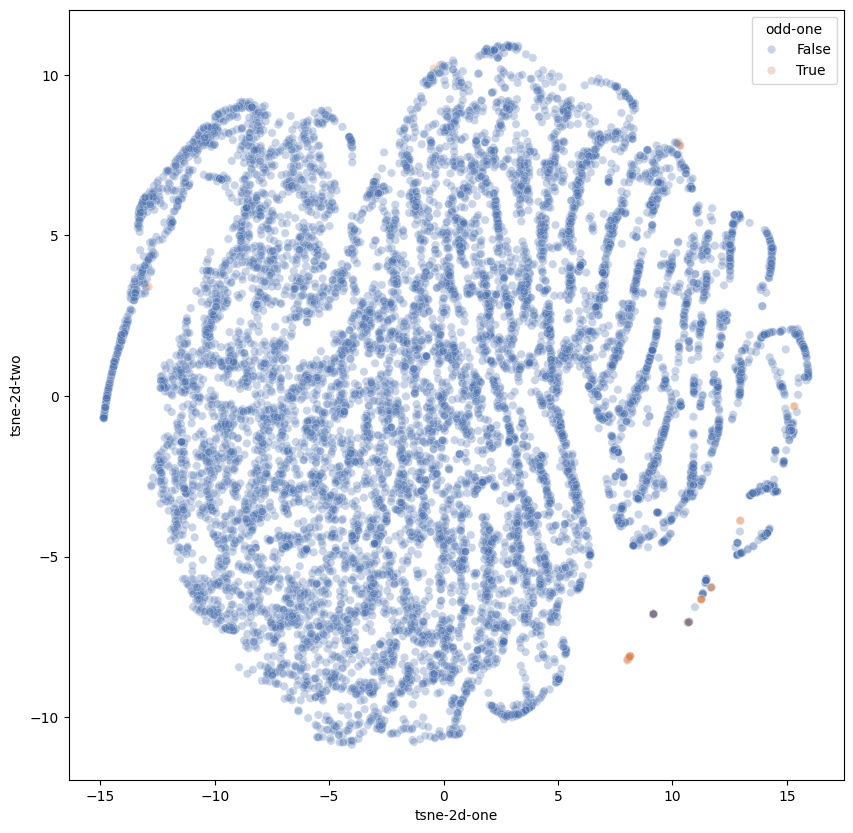

In [85]:
plt.figure(figsize=(10,10))
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [249]:
from torch.utils.data import SequentialSampler

datasetFull = CompoundsStreamFull(iso_smiles, smiles_graphs, smiles_id_dict)


In [266]:
model = GINConvNet_augmented()
model.load_state_dict(torch.load("../GraphDTA/model_GINConvNet_davis.model", weights_only=True))
# model.train()
# with torch.no_grad():
#     m2 = model.forward_dummy(datasetFull.get_data())

dataset = CompoundsStream(iso_smiles, smiles_graphs, smiles_id_dict)
embedding_loader = DataLoader(dataset=dataset, batch_size = 1)
model.eval()       
embedded_mols = []
with torch.no_grad():
    for data in embedding_loader:
        #print(data.x[0], model2.g_embedding(data.x[0]))        
        m = model.g_embedding(data)
        embedded_mols.append(m)
# with torch.no_grad():
#     m2 = model.forward_dummy(datasetFull.get_data())


In [260]:
pca = PCA(n_components=3)
#pca_result = pca.fit_transform(m2.numpy() )
pca_result = pca.fit_transform(np.array([ item[0].numpy().reshape(-1) for item in embedded_mols ]))

df = pd.DataFrame({})
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]



/tmp/ipykernel_2497128/1330560496.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

<Figure size 1000x1000 with 0 Axes>

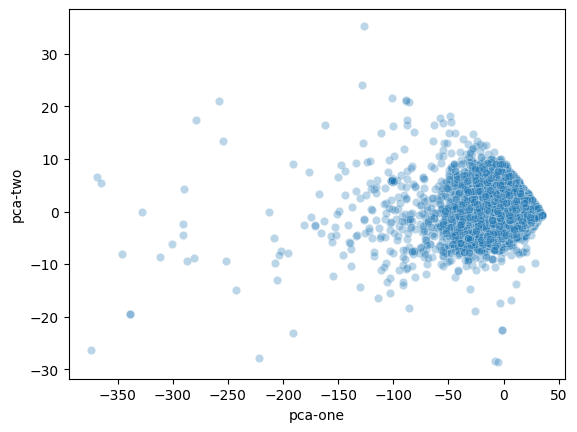

In [261]:
plt.figure(figsize=(10,10))
np.random.seed(42)
fig, ax = plt.subplots()
rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3,
    ax=ax
)
# ax.set_xlim(-200, 200)
# ax.set_ylim(-200,200)

/tmp/ipykernel_2497128/1393091783.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

<Figure size 1000x1000 with 0 Axes>

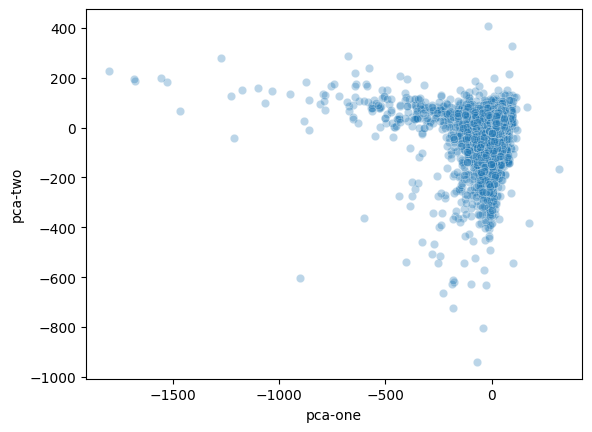

In [258]:
plt.figure(figsize=(10,10))
np.random.seed(42)
fig, ax = plt.subplots()
rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3,
    ax=ax
)

In [267]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(np.array([ item[0].numpy().reshape(-1) for item in embedded_mols ]))

/home/roozbeh/Desktop/comp-bio/task1/.venv_graphdta/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11914 samples in 0.002s...
[t-SNE] Computed neighbors for 11914 samples in 0.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11914
[t-SNE] Computed conditional probabilities for sample 2000 / 11914
[t-SNE] Computed conditional probabilities for sample 3000 / 11914
[t-SNE] Computed conditional probabilities for sample 4000 / 11914
[t-SNE] Computed conditional probabilities for sample 5000 / 11914
[t-SNE] Computed conditional probabilities for sample 6000 / 11914
[t-SNE] Computed conditional probabilities for sample 7000 / 11914
[t-SNE] Computed conditional probabilities for sample 8000 / 11914
[t-SNE] Computed conditional probabilities for sample 9000 / 11914
[t-SNE] Computed conditional probabilities for sample 10000 / 11914
[t-SNE] Computed conditional probabilities for sample 11000 / 11914
[t-SNE] Computed conditional probabilities for sample 11914 / 11914
[t-SNE] Mean sigma: 12.753759
[t-SNE] KL divergen

In [268]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

/tmp/ipykernel_2497128/2748341057.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

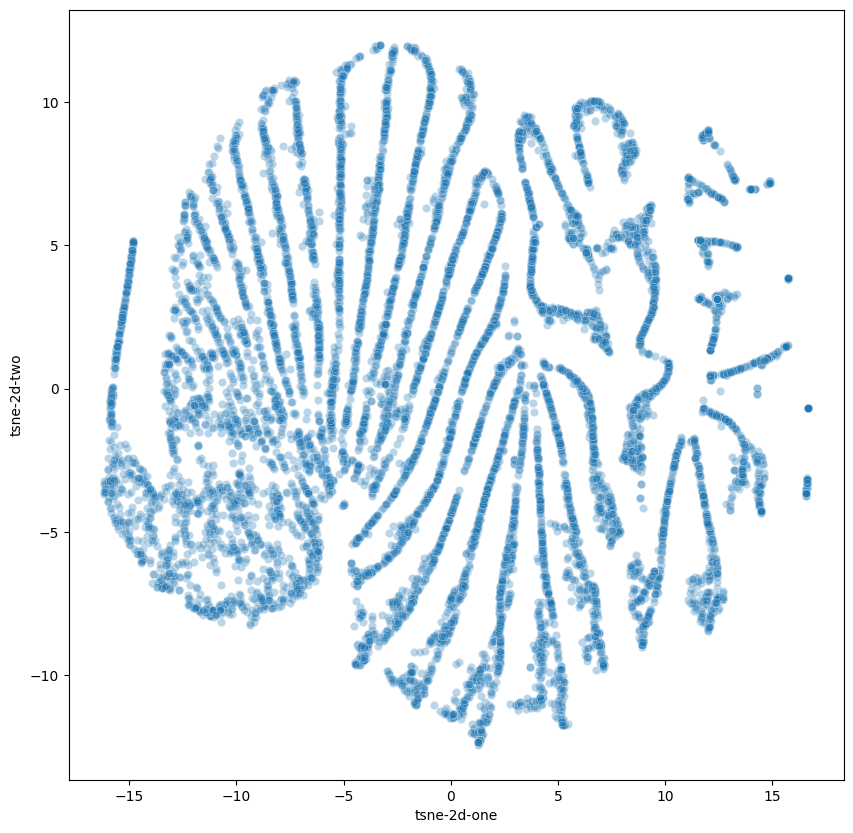

In [265]:
plt.figure(figsize=(10,10))
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

/tmp/ipykernel_2497128/2748341057.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

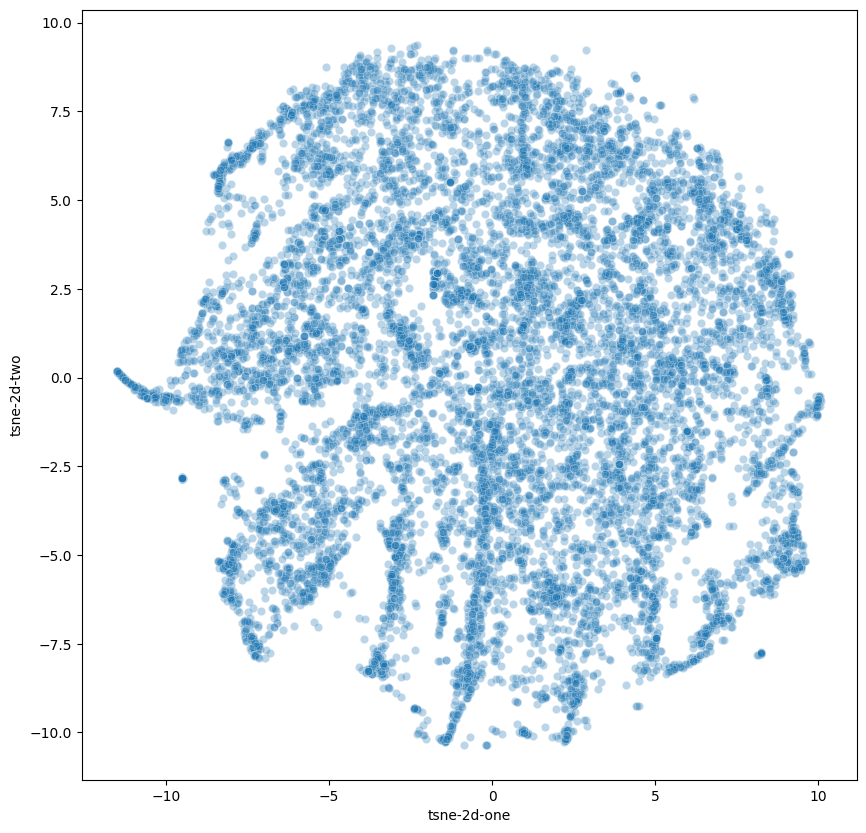

In [269]:
plt.figure(figsize=(10,10))
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="odd-one",
    palette=sns.color_palette("deep", 100),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)